In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn tensorflow opencv-python

  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/331.9 MB 8.3 MB/s eta 0:00:40
   ---------------------------------------- 2.6/331.9 MB 7.9 MB/s eta 0:00:42
    --------------------------------------- 6.0/331.9 MB 11.5 MB/s eta 0:00:29
   - -------------------------------------- 10.0/331.9 MB 13.5 MB/s eta 0:00:24
   - -------------------------------------- 11.3/331.9 MB 12.6 MB/s eta 0:00:26
   - -------------------------------------- 13.4/331.9 MB 11.5 MB/s eta 0:00:28
   - -------------------------------------- 14.7/331.9 MB 10.9 MB/s eta 0:00:30
   - -------------------------------------- 16.3/331.9 MB 10.2 MB/s eta 0:00:31
   -- ------------------------------------- 17.8/331.9 MB 9.8 MB/s eta 0:00:33
   -- ------------------------------------- 19.1/331.9 MB 9.4 MB/s eta 0:00:34
   -- ------------------------------------- 20.7/331.9 MB 9.3 MB/s

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.python.framework import ops
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Wildfire Binary Classification using CNN
# ==========================================
This notebook contains code to classify satellite images as containing wildfire or not using a Convolutional Neural Network (CNN). The dataset consists of satellite images labeled with binary values indicating the presence or absence of wildfire.

Dataset can be found [here!](https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset)

### Data Preprocessing
- Retrieve data
- Label Data
- Normalize Data
- Splitng data

In [ ]:
dir = './data/wildfire/train'
x = []
y = []
for direct in os.listdir(dir):
    print("Loading dataset training {}".format(direct))
    for filename in os.listdir(os.path.join(dir,direct)):
        img_path = os.path.join(dir,direct,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32,32))
        img = np.array(img)
        img = img/255
        x.append(img)
        y.append(direct)

Loading dataset training nowildfire
Loading dataset training wildfire


In [ ]:
dir_val = './data/wildfire/valid'
x_val = []
y_val = []
for direct in os.listdir(dir_val):
    print("Loading dataset validation {}".format(direct))
    for filename in os.listdir(os.path.join(dir_val,direct)):
        img_path = os.path.join(dir_val,direct,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32,32))
        img = np.array(img)
        img = img/255
        x_val.append(img)
        y_val.append(direct)

Loading dataset validation nowildfire
Loading dataset validation wildfire


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
int_label = le.fit_transform(y)
one_hot = to_categorical(int_label)

In [ ]:
print(int_label)

[0 0 0 ... 1 1 1]


In [ ]:
print(one_hot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
le = LabelEncoder()
int_label = le.fit_transform(y_val)
one_hot_val = to_categorical(int_label)

In [ ]:
x = np.array(x)
x_val = np.array(x_val)

In [ ]:
from sklearn.utils import shuffle
x,one_hot = shuffle(x,one_hot)
x_val,one_hot_val = shuffle(x_val,one_hot_val)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,one_hot,test_size=0.2)

In [ ]:
Y_train = np.array([np.array(i) for i in Y_train])
Y_test = np.array([np.array(i) for i in Y_test])
one_hot_val = np.array([np.array(i) for i in one_hot_val])

### Model Training
- Using CNN
- 8 Total layers


In [ ]:
from keras import layers
from keras import models
from keras.callbacks import EarlyStopping

model = Sequential()

#Detects basic features like edges and textures using 32 different 3x3 filters
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
#Detects more complex patterns by combining features from the first layer using 64 filters
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
#Reduces spatial dimensions by keeping only the maximum values in 2x2 regions, making the model more efficient
model.add(MaxPooling2D(pool_size=(2, 2)))
#Normalizes layer inputs to stabilize and speed up training
model.add(BatchNormalization())

#Converts the 2D feature maps into a 1D vector for the dense layers
model.add(Flatten())
#Randomly sets 20% of inputs to zero during training to prevent overfitting
model.add(Dropout(0.2))
#Fully connected layer that learns complex combinations of features
model.add(Dense(64, activation='relu'))
#Output layer for binary classification, produces probabilities for 2 classes
model.add(Dense(2, activation='softmax'))




d:\Users\Loyd\miniconda3\envs\nasa\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Add early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_filepath = './ml/checkpoint/checkpoint_epoch_{epoch:02d}_val_loss_{val_loss:.2f}.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,068,418 (4.08 MB)

 Trainable params: 1,068,290 (4.08 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,Y_train,validation_data=(x_val,one_hot_val),batch_size=32,epochs=10,callbacks=[early_stop,model_checkpoint_callback])

Epoch 1/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9623 - loss: 0.0993 - val_accuracy: 0.9322 - val_loss: 0.2268
Epoch 2/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9654 - loss: 0.0950 - val_accuracy: 0.9502 - val_loss: 0.1418
Epoch 3/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9686 - loss: 0.0850 - val_accuracy: 0.9471 - val_loss: 0.1529
Epoch 4/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9749 - loss: 0.0693 - val_accuracy: 0.9346 - val_loss: 0.2199
Epoch 5/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9739 - loss: 0.0709 - val_accuracy: 0.9475 - val_loss: 0.1705


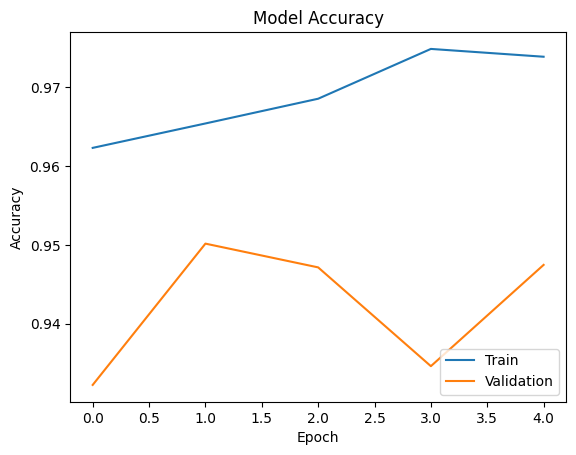

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

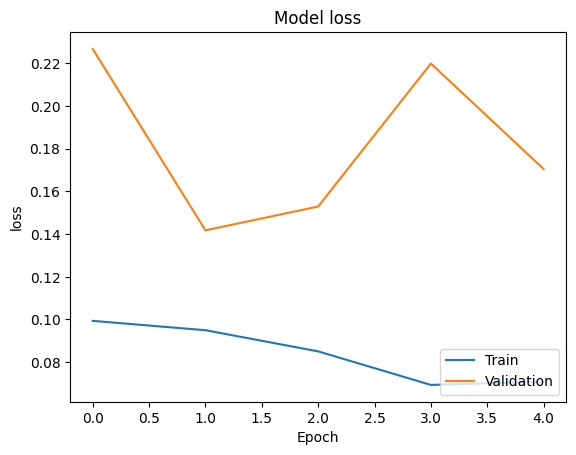

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

### Model Evaluation
- Metrics
- Picking best model
- Deploying

In [ ]:
from tensorflow.keras.models import load_model
# Load the best model from the checkpoint
best_model = load_model('.\\checkpoint\\checkpoint_epoch_02_val_loss_0.14.keras')

In [ ]:
import matplotlib.image as mpimg
import os
os.listdir('./data/wildfire/test/')

['nowildfire', 'wildfire']

In [ ]:
y_true = []
y_pred = []
for direct in os.listdir('./data/wildfire/test/'):
    print("Predicting dataset {}".format(direct))
    for filename in os.listdir(os.path.join('./data/wildfire/test/',direct)):
        img_path = os.path.join('./data/wildfire/test/',direct,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32,32))
        img = np.array(img)
        img = img/255
        img = np.expand_dims(img, axis=0)
        prediction = best_model.predict(img)
        y_true.append(direct)
        y_pred.append(le.inverse_transform([np.argmax(prediction)])[0])
        print("Image: {}, Predicted label: {}, Confidence: {:.2f}%".format(filename, le.inverse_transform([np.argmax(prediction)])[0], np.max(prediction)*100))


Predicting dataset nowildfire
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image: -113.91777,50.901087.jpg, Predicted label: nowildfire, Confidence: 98.18%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image: -113.91782,50.896917.jpg, Predicted label: nowildfire, Confidence: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image: -113.91793,51.091205.jpg, Predicted label: nowildfire, Confidence: 99.94%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: -113.918016,50.978447.jpg, Predicted label: nowildfire, Confidence: 98.38%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: -113.918155,51.129969.jpg, Predicted label: nowildfire, Confidence: 99.95%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: -113.918231,51.154481.jpg, Predicted label: wildfire, Confidence: 81.99%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image: -113.91831,51.088925.jpg, Predicted label: nowildfire, Confidence: 99.81%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: -113.918315,51.112177.jpg, Predicted label: nowildfire, Confidence: 69.29%
1/1 ━━━━━━━━━━━

Accuracy: 0.9533
Precision: 0.9534
Recall: 0.9533
F1 Score: 0.9533


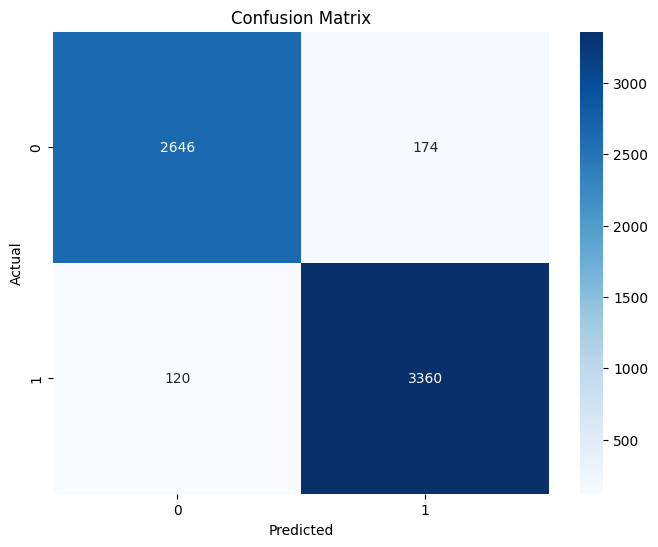

In [ ]:

# Import required libraries for metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
best_model.save('wildfire_model.keras')

In [ ]:
best_model.export("export/Servo/1")

INFO:tensorflow:Assets written to: export/Servo/1\assets


INFO:tensorflow:Assets written to: export/Servo/1\assets


Saved artifact at 'export/Servo/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2013577673808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2013579577296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2013579577680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2013579576720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2013579578640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2013579579024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2013579578448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2013579577488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2013579580176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2013579580560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2013579579984: TensorSpec(shape=(), dty

In [ ]:
import tarfile
with tarfile.open('model.tar.gz', 'w:gz') as tar:
    tar.add('export')

### Sagemaker deployment
Use the cells below in sagemaker

In [ ]:
import sagemaker
from sagemaker.tensorflow import TensorFlowModel
import boto3
import tarfile
import os

In [ ]:
role = sagemaker.get_execution_role()
sagemaker_session = sagemaker.Session()

In [ ]:
# upload model.tar.gz to sagemaker before doint this cell
model_artifacts = sagemaker_session.upload_data(
        path='model.tar.gz',
        key_prefix='model/wildfire',
        bucket='loyd-bucket-selflearning-1423'
    )

In [ ]:
tensorflow_model = TensorFlowModel(
        model_data=model_artifacts,
        role=role,
        framework_version='2.18'
    )

In [ ]:
predictor = tensorflow_model.deploy(
        initial_instance_count=1,
        instance_type='ml.t2.medium',
        endpoint_name='wf-classifier'
    )

### Test deployment
- Test sagemaker endpoint

In [ ]:
wildfire_image_loc = './data/wildfire/test/wildfire/-59.03238,51.85132.jpg'
nowildfire_image_loc = './data/wildfire/test/no_wildfire/-73.602,45.421799.jpg'

In [ ]:

img = cv2.imread(wildfire_image_loc)
img = cv2.resize(img, (32,32))
img = np.array(img)
img = img/255
img = np.expand_dims(img, axis=0)
# prediction = best_model.predict(img)

In [ ]:
img_data = img.tolist()
img_data

[[[[0.2627450980392157, 0.35294117647058826, 0.3215686274509804],
   [0.22745098039215686, 0.28627450980392155, 0.29411764705882354],
   [0.5450980392156862, 0.5725490196078431, 0.6470588235294118],
   [0.5372549019607843, 0.5725490196078431, 0.6274509803921569],
   [0.38823529411764707, 0.43529411764705883, 0.49411764705882355],
   [0.09803921568627451, 0.23529411764705882, 0.13333333333333333],
   [0.12156862745098039, 0.23529411764705882, 0.16862745098039217],
   [0.08627450980392157, 0.22745098039215686, 0.1411764705882353],
   [0.11372549019607843, 0.2627450980392157, 0.1607843137254902],
   [0.11764705882352941, 0.25098039215686274, 0.1843137254901961],
   [0.10588235294117647, 0.25882352941176473, 0.1568627450980392],
   [0.10196078431372549, 0.25098039215686274, 0.13333333333333333],
   [0.07450980392156863, 0.2196078431372549, 0.11372549019607843],
   [0.09803921568627451, 0.27058823529411763, 0.10980392156862745],
   [0.11372549019607843, 0.21176470588235294, 0.19215686274509

In [ ]:
import boto3
import json
client = boto3.client('sagemaker-runtime')
endpoint = "https://runtime.sagemaker.ap-southeast-1.amazonaws.com/endpoints/wf-classifier/invocations"
endpoint_name = "wf-classifier"
response = client.invoke_endpoint(
    EndpointName=endpoint_name,
    Body=json.dumps({'instances': img_data}),
    ContentType='application/json'
)

In [ ]:
result = json.loads(response['Body'].read().decode())
result

{'predictions': [[0.0133339465, 0.986666]]}